# Microcanonical ensemble - distinguishable particles
Authors: Livia Maskos, Professor Bart Hoogenboom

Outline:

- generate an animation with all possible configurations of a microcanonical ensemble for distinguisable particles (variables: lattice sites, particles)
- for a given 2D lattice: create plot (number of configurations against number of particles)
!!! next steps: animation coming + need to find a way of changing the for huge 'for' loop containing all the 'if', with the ability of changing the particles' color + create a box to ask for number of particles and lattice sites. Code becomes very long for 3+ particles considered.

Imports

In [1]:
!conda install -y -q ffmpeg

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import itertools
import matplotlib.animation as animation
from IPython.core.display import HTML
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

Set up

In [3]:
from IPython.display import display
def f(latticeside):
    display(latticeside)
    return latticeside

In [4]:
w = interactive(f, latticeside=widgets.IntSlider(min=2, max=6))
type(w)

ipywidgets.widgets.interaction.interactive

In [27]:
w.children
display(w)

w.kwargs
lat = w.result

interactive(children=(IntSlider(value=3, description='latticeside', max=6, min=2), Output(outputs=({'output_ty…

In [28]:
M1 = lat - 1 # considering the 0 point
M = lat**2 # number of lattice sites
print('Number of lattice sites is',M)

Number of lattice sites is 9


Number of particles to choose

In [35]:
def part(Num_part):
    display(Num_part)
    return Num_part

z = interactive(part, Num_part=widgets.IntSlider(min=1, max=4))
type(z)

z.children
display(z)

interactive(children=(IntSlider(value=1, description='Num_part', max=4, min=1), Output()), _dom_classes=('widg…

In [37]:
z.kwargs
N = z.result

print('We consider %d'% N, 'particles')

We consider 2 particles


### Generating the points coordinates on a 2D lattice (x and y)

In [38]:
xi = [*range(0,M1+1)] #possible x coordinates
yi = [*range(0,M1+1)] #possible y coordinates
points = [*itertools.product(xi,yi)] #possible point coordinates

In [39]:
#particles considered and their coordinates 
particles = [*range(0, N, 1)]
index = 0
while index < N:
    particles[index] = points
    index = index + 1


#possible configurations of the system
config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)]

In [40]:
configurations=[]
for elem in config:
    l = list(elem)
    configurations.append(l)
print(configurations)

[[(0, 0), (0, 1)], [(0, 0), (0, 2)], [(0, 0), (1, 0)], [(0, 0), (1, 1)], [(0, 0), (1, 2)], [(0, 0), (2, 0)], [(0, 0), (2, 1)], [(0, 0), (2, 2)], [(0, 1), (0, 0)], [(0, 1), (0, 2)], [(0, 1), (1, 0)], [(0, 1), (1, 1)], [(0, 1), (1, 2)], [(0, 1), (2, 0)], [(0, 1), (2, 1)], [(0, 1), (2, 2)], [(0, 2), (0, 0)], [(0, 2), (0, 1)], [(0, 2), (1, 0)], [(0, 2), (1, 1)], [(0, 2), (1, 2)], [(0, 2), (2, 0)], [(0, 2), (2, 1)], [(0, 2), (2, 2)], [(1, 0), (0, 0)], [(1, 0), (0, 1)], [(1, 0), (0, 2)], [(1, 0), (1, 1)], [(1, 0), (1, 2)], [(1, 0), (2, 0)], [(1, 0), (2, 1)], [(1, 0), (2, 2)], [(1, 1), (0, 0)], [(1, 1), (0, 1)], [(1, 1), (0, 2)], [(1, 1), (1, 0)], [(1, 1), (1, 2)], [(1, 1), (2, 0)], [(1, 1), (2, 1)], [(1, 1), (2, 2)], [(1, 2), (0, 0)], [(1, 2), (0, 1)], [(1, 2), (0, 2)], [(1, 2), (1, 0)], [(1, 2), (1, 1)], [(1, 2), (2, 0)], [(1, 2), (2, 1)], [(1, 2), (2, 2)], [(2, 0), (0, 0)], [(2, 0), (0, 1)], [(2, 0), (0, 2)], [(2, 0), (1, 0)], [(2, 0), (1, 1)], [(2, 0), (1, 2)], [(2, 0), (2, 1)], [(2, 0), 

In [41]:
# total number of configurations
totalnum = len(configurations)
print('The total number of configurations is',totalnum)

The total number of configurations is 72


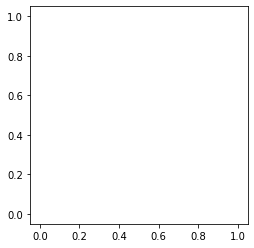

In [42]:
fig, ax = plt.subplots()
plt.axis('scaled')
        
def animate(frame):
    ax.clear()
    ax.set_xlim(-0.5, M1+0.5)
    ax.set_ylim(-0.5, M1+0.5)
    start = -0.5
    stop = M1+0.5
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax.axvline(x=xc, color='red')
        ax.axhline(y=xc, color='red')
    elem = configurations[frame]
    colo = ['r', 'g', 'b','k']
    i = 0
    for t in elem:
        circle = plt.Circle((t[0], t[1]) ,0.1 , color=colo[i])
        ax.add_patch(circle)
        i =+1

In [43]:
animation1 = animation.FuncAnimation(fig, animate, interval=500, frames=totalnum)
HTML(animation1.to_html5_video())

In [44]:
listforplot=[]
listforplot.append(totalnum)
print(listforplot)

[72]


!!!!need to store previous number of configurations to get a list and then plot

(0, 7000000)

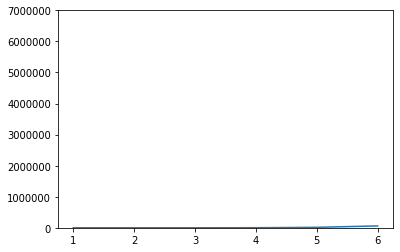

In [45]:
# 2 by 2 lattice
num = [4, 12, 24, 24]

# 3 by 3 lattice
num9 = [9, 72, 504, 3024, 15120, 60480]
numpart = [1, 2, 3, 4, 5, 6]
plt.plot(numpart, num9)
plt.ylim(0,7000000)
(0, 7000000)

(0, 7000000)

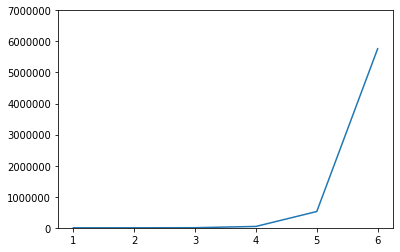

In [46]:
# 4 by 4 lattice
num16 = [16, 240, 3360, 43680, 524160, 5765760]
plt.plot(numpart, num16)
plt.ylim(0,7000000)
(0, 7000000)

(0, 7000000)

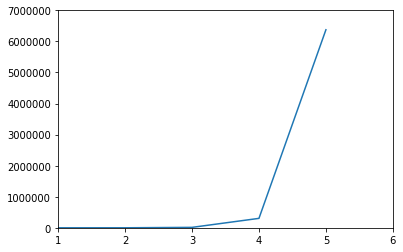

In [47]:
# 5 by 5 lattice
num25 = [25, 600, 13800, 303600, 6375600]
n = [1, 2, 3, 4, 5]
plt.plot(n, num25)
plt.xlim(1,6)
plt.ylim(0,7000000)
(0, 7000000)